In [1]:
"""Build a sentiment analysis / polarity model

Sentiment analysis can be casted as a binary text classification problem,
that is fitting a linear classifier on features extracted from the text
of the user messages so as to guess wether the opinion of the author is
positive or negative.

In this examples we will use a movie review dataset.

"""
# Author: Olivier Grisel <olivier.grisel@ensta.org>
# License: Simplified BSD
# We have modified the code base, adjusted the imports, to make the skeleton work as needed.
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import load_files
from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [3]:
# the training data folder must be passed as first argument
movie_reviews_data_folder = r"data/txt_sentoken/"
dataset = load_files(movie_reviews_data_folder, shuffle=False)
print("n_samples: %d" % len(dataset.data))

n_samples: 2000


In [5]:
# split the dataset in training and test set:
docs_train, docs_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.25, random_state=None)

In [10]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(dataset.target_names))
    plt.xticks(tick_marks, dataset.target_names, rotation=45)
    plt.yticks(tick_marks, dataset.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

* Based upon Problem 2 pick some parameters for TfidfVectorizer
    * "fit" your TfidfVectorizer using docs_train
    * Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
    * Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
    * Note, be sure to use the same Tf-idf-weighted class (**"fit" using docs_train**) to transform **both** docs_test and docs_train
* Examine two classifiers provided by scikit-learn 
    * LinearSVC
    * KNeighborsClassifier
    * Try a number of different parameter settings for each and judge your performance using a confusion matrix (see Problem 1 for an example).
* Does one classifier, or one set of parameters work better?
    * Why do you think it might be working better?
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
print("Extracting features from the dataset using a sparse vectorizer")
vectorizer = TfidfVectorizer(docs_train)

X_train = vectorizer.fit_transform(docs_train)
X_test = vectorizer.transform(docs_test)

print("n_samples: %d, n_features: %d" % X_train.shape)
print("n_samples: %d, n_features: %d" % X_test.shape)
print len(docs_train)
print len(docs_test)



vect = TfidfVectorizer(sublinear_tf=True, max_df=0.5, analyzer='word', 
           stop_words='english')

X_train = vect.fit_transform(docs_train)
X_test = vect.transform(docs_test)

print("n_samples: %d, n_features: %d" % X_train.shape)
print("n_samples: %d, n_features: %d" % X_test.shape)

#print("n_samples: %d, n_features: %d" % X_train.shape)

Extracting features from the dataset using a sparse vectorizer
n_samples: 1500, n_features: 35313
n_samples: 500, n_features: 35313
1500
500
n_samples: 1500, n_features: 35000
n_samples: 500, n_features: 35000


0.878
[[204  33]
 [ 28 235]]


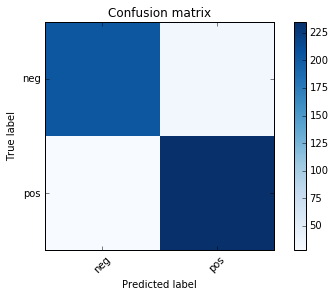

In [93]:

#With Stop Words stay in the model
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
C = 1
text_clf  = Pipeline([
       ('vect', TfidfVectorizer(sublinear_tf=True, max_df=0.5, analyzer='word')),
       ('clf', LinearSVC(C=C))])
text_clf= text_clf.fit(docs_train, y_train)
predicted = text_clf.predict(docs_test)
np.mean(predicted == y_test) 
print(np.mean(predicted == y_test))
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)
%matplotlib inline
plot_confusion_matrix(cm)



0.742
[[179  58]
 [ 71 192]]


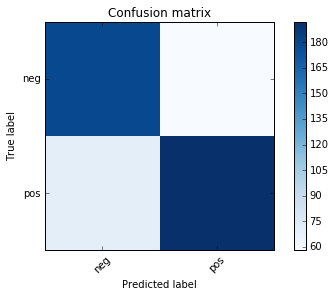

In [103]:

from sklearn import svm
C = 1000
text_clf  = Pipeline([
       ('vect', TfidfVectorizer(min_df = 0.1,analyzer='word', sublinear_tf=True, use_idf=True)),
       ('clf', LinearSVC(C=C, tol=1e-3))])
text_clf= text_clf.fit(docs_train, y_train)
predicted = text_clf.predict(docs_test)
np.mean(predicted == y_test) 
print(np.mean(predicted == y_test))
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)
%matplotlib inline
plot_confusion_matrix(cm)

0.872
[[204  33]
 [ 31 232]]


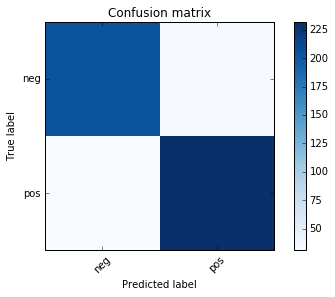

In [67]:
#Without Stop Words stay in the model
from sklearn import svm
C = 1
text_clf  = Pipeline([
       ('vect', TfidfVectorizer(sublinear_tf=True, min_df=0.005, analyzer='word', 
           stop_words='english')),
       ('clf', LinearSVC(C=C, tol=1e-3))])
text_clf= text_clf.fit(docs_train, y_train)
predicted = text_clf.predict(docs_test)
np.mean(predicted == y_test) 
print(np.mean(predicted == y_test))
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)
%matplotlib inline
plot_confusion_matrix(cm)

0.714
[[146  91]
 [ 52 211]]


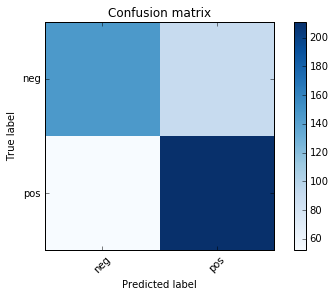

In [164]:
from sklearn import neighbors

vect = TfidfVectorizer(sublinear_tf=True, max_df=0.5, analyzer='word')
n_neighbors=5
weights='distance'

knn=neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
X_train = vect.fit_transform(docs_train)
X_test = vect.transform(docs_test)

knn.fit(X_train, y_train)
predicted = knn.predict(X_test)
print(np.mean(predicted == y_test))

cm = metrics.confusion_matrix(y_test, predicted)
print(cm)
%matplotlib inline
plot_confusion_matrix(cm)


In [162]:

print ("It is negative review shoulde be predicted as 0 instead it is predicted as 1 :")
print predicted[497]
print y_test[497]
print docs_test[497]



It is negative review shoulde be predicted as 0 instead it is predicted as 1 :
1
0
this is my first review that i post to this newsgroup , and i kind of feel like i have to say something negative about this film . 
no one else seems to care that it takes certain liberties that should not be taken with a historical story . 
however , even if one thinks of it as fiction , " the prince of egypt " remains shallow . 
but i'll begin from the beginning . 
the biggest difference between the original , biblical story and this version is that moses has some semblance of divinity in the bible , whereas the animated version gives the impression of a reluctant hero . 
maybe it's just me , but if i knew i had god on my side , i'd have a little bit more confidence . 
there are other differences as well , such as a lack of important female characters and the passing over of the original pharoah's death like it's nothing but a thing . 
most of all , though , the story's focus has shifted . 
rather than

In [163]:

print ("It is positive review shoulde be predicted as 1 instead it is predicted as 0 :")
print predicted[492]
print y_test[492]
print docs_test[492]


It is positive review shoulde be predicted as 1 instead it is predicted as 0 :
0
1
the second jackal-based film to come out in 1997 ( the other starring bruce willis was simply entitled the jackal ) , this one stars aidan quinn and donald sutherland , and is directed by a man who hailed from joblo's own alma matter , concordia university in montreal , canada . 
the story is based on the exploits of the real terrorist known as the jackal , but does not pretend to be 100% factual . 
plot : naval officer ramirez ( quinn ) gets called upon by the cia to impersonate the international terrorist known as the jackal , in order to put an end to the actual militant's radical activities . 
he is chosen for this role because he physically resembles the real terrorist to a tee . 
ramirez reluctantly agrees to take part in this " assignment " , and soon finds himself wrapped up in a true web of international terrorism , intrigue and double-personality syndrome ( which does not sit well with his unin